In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_cleaned.csv')
df

,PublishedAgo,Rating,Employer,JobTitle,Founded,Type,Industry,Sector,MinSalary,MaxSalary,City,State,Country,MinSize,MaxSize,MinRevenue,MaxRevenue
0,5d,4.3,KGS Technology Group Inc,Junior Software Engineer,2008.0,Company - Private,Information Technology Support Services,Information Technology,60.0,80.0,Remote,Remote,Remote,51.0,200.0,1.000000e+06,5.000000e+06
1,4d,4.2,"QSC, LLC",AI Engineer,1968.0,Company - Private,Electronics Manufacturing,Manufacturing,102.0,147.0,Remote,Remote,Remote,501.0,1000.0,NaN,NaN
2,30d+,4.2,MIT Lincoln Laboratory,AI Engineer,1951.0,Nonprofit Organization,Aerospace & Defense,Aerospace & Defense,94.0,138.0,Lexington,MA,United States,1001.0,5000.0,NaN,NaN
3,6d,4.2,Hewlett Packard Enterprise,AI Solution Engineer,2015.0,Company - Public,Information Technology Support Services,Information Technology,123.0,283.0,San Jose,CA,United States,10000.0,10000.0,NaN,NaN
4,2d,3.3,Oran Inc,AI/ML Cloud Engineer,2004.0,Company - Private,Business Consulting,Management & Consulting,140.0,140.0,Remote,Remote,Remote,1.0,50.0,1.000000e+06,5.000000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,9d,4.0,PayPal,AI Machine Learning Engineer,1998.0,Company - Public,Internet & Web Services,Information Technology,97.0,234.0,San Jose,CA,United States,10000.0,10000.0,1.000000e+10,1.000000e+10
607,12d,3.5,Eightfold.AI,Machine Learning Engineer,2016.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,121.0,163.0,Santa Clara,CA,United States,501.0,1000.0,NaN,NaN
608,30d+,4.4,Adobe,Research Scientist/Engineer,1982.0,Company - Public,Computer Hardware Development,Information Technology,121.0,239.0,San Jose,CA,United States,10000.0,10000.0,5.000000e+09,1.000000e+10
609,30d+,4.5,Curai,Machine Learning Engineer (Remote),2017.0,Company - Private,Hospitals & Health Clinics,Healthcare,150.0,200.0,San Francisco,CA,United States,51.0,200.0,NaN,NaN


In [3]:
df['Experience'] = df['JobTitle'].apply(lambda x: 'Junior' if ('Junior' in x or 'Entry Level' in x or 'University Graduates' in x) else ('Senior' if 'Senior' in x else 'NA'))

keyword_mapping = {
    'Machine Learning Engineer': 'ML Engineer',
    'AI Engineer': 'AI Engineer',
    'Software Engineer': 'Software Engineer',
    'Frontend Engineer': 'Software Engineer',
    'Research Engineer': 'Research Engineer',
    'Staff Software Engineer': 'Software Engineer',
    'Principal Engineer': 'Software Engineer',
    'AI Designer': 'AI Engineer',
    'Applied Machine Learning Engineer': 'ML Engineer',
    'AI Solution Engineer': 'AI Engineer',
    'AI/ML Research Engineer': 'Research Engineer',
    'Architecture Energy Modeling Engineer': 'Software Engineer',
    'AI Machine Learning Engineer': 'ML Engineer',
    'ML Supercomputer Performance Software Engineer': 'Software Engineer',
    'Lead Engineer': 'Software Engineer',
    'AI Prompt Engineer': 'AI Engineer',
    'Research Scientist': 'Research Engineer',
    'Junior AI/ML Software Developer': 'AI Engineer',
    'Senior Software Engineer': 'Software Engineer',
    'Research Scientist/Engineer': 'Research Engineer',
    'AI Cybersecurity Engineer': 'AI Engineer',
    'Junior Software Engineer': 'Software Engineer',
    'Conversational AI / NLP Engineer': 'AI Engineer',
    'Computer Vision AI Engineer': 'AI Engineer',
    'Senior ML Engineer': 'ML Engineer',
    'Frontend Software Engineer': 'Software Engineer',
    'Principal Engineer, Machine Learning': 'ML Engineer',
    'Senior Staff Front-End Engineer': 'Software Engineer',
    'Senior AI/ML Engineer': 'ML Engineer',
    'AI/ML Engineer': 'ML Engineer',
    'Machine Learning Engineer (Entry Level)': 'ML Engineer',
    'AI/ML Cloud Engineer': 'AI Engineer'
}

df['Profession'] = df['JobTitle'].apply(lambda x: next((v for k, v in keyword_mapping.items() if k in x), 'NA'))

Let's add two new columns. One, 'Profession', which is like a simplification of the job title. We have a dict with the different main types of jobs. 'Experience' tell us the job's seniority.

In [4]:
df['AvgSalary'] = (df['MinSalary'] + df['MaxSalary']) / 2
df['AvgSize'] = (df['MinSize'] + df['MaxSize']) / 2
df['AvgRevenue'] = (df['MinRevenue'] + df['MaxRevenue']) / 2
df

,PublishedAgo,Rating,Employer,JobTitle,Founded,Type,Industry,Sector,MinSalary,MaxSalary,...,Country,MinSize,MaxSize,MinRevenue,MaxRevenue,Experience,Profession,AvgSalary,AvgSize,AvgRevenue
0,5d,4.3,KGS Technology Group Inc,Junior Software Engineer,2008.0,Company - Private,Information Technology Support Services,Information Technology,60.0,80.0,...,Remote,51.0,200.0,1.000000e+06,5.000000e+06,Junior,Software Engineer,70.0,125.5,3.000000e+06
1,4d,4.2,"QSC, LLC",AI Engineer,1968.0,Company - Private,Electronics Manufacturing,Manufacturing,102.0,147.0,...,Remote,501.0,1000.0,NaN,NaN,NA,AI Engineer,124.5,750.5,NaN
2,30d+,4.2,MIT Lincoln Laboratory,AI Engineer,1951.0,Nonprofit Organization,Aerospace & Defense,Aerospace & Defense,94.0,138.0,...,United States,1001.0,5000.0,NaN,NaN,NA,AI Engineer,116.0,3000.5,NaN
3,6d,4.2,Hewlett Packard Enterprise,AI Solution Engineer,2015.0,Company - Public,Information Technology Support Services,Information Technology,123.0,283.0,...,United States,10000.0,10000.0,NaN,NaN,NA,AI Engineer,203.0,10000.0,NaN
4,2d,3.3,Oran Inc,AI/ML Cloud Engineer,2004.0,Company - Private,Business Consulting,Management & Consulting,140.0,140.0,...,Remote,1.0,50.0,1.000000e+06,5.000000e+06,NA,AI Engineer,140.0,25.5,3.000000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,9d,4.0,PayPal,AI Machine Learning Engineer,1998.0,Company - Public,Internet & Web Services,Information Technology,97.0,234.0,...,United States,10000.0,10000.0,1.000000e+10,1.000000e+10,NA,ML Engineer,165.5,10000.0,1.000000e+10
607,12d,3.5,Eightfold.AI,Machine Learning Engineer,2016.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,121.0,163.0,...,United States,501.0,1000.0,NaN,NaN,NA,ML Engineer,142.0,750.5,NaN
608,30d+,4.4,Adobe,Research Scientist/Engineer,1982.0,Company - Public,Computer Hardware Development,Information Technology,121.0,239.0,...,United States,10000.0,10000.0,5.000000e+09,1.000000e+10,NA,Research Engineer,180.0,10000.0,7.500000e+09
609,30d+,4.5,Curai,Machine Learning Engineer (Remote),2017.0,Company - Private,Hospitals & Health Clinics,Healthcare,150.0,200.0,...,United States,51.0,200.0,NaN,NaN,NA,ML Engineer,175.0,125.5,NaN


Add three new columns with the averange values of the data that have Min and Max

In [5]:
df.describe()

,Rating,Founded,MinSalary,MaxSalary,MinSize,MaxSize,MinRevenue,MaxRevenue,AvgSalary,AvgSize,AvgRevenue
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,4.990000e+02,4.990000e+02,611.000000,611.000000,4.990000e+02
mean,4.135025,1980.661211,125.746318,206.202291,7777.972177,7979.132570,5.800248e+09,7.850341e+09,165.974304,7878.552373,6.825295e+09
std,0.402228,39.132328,33.489114,56.258495,4063.557246,3778.194868,4.090706e+09,3.272137e+09,41.956427,3905.564426,3.529978e+09
min,3.300000,1861.000000,60.000000,80.000000,1.000000,50.000000,1.000000e+06,5.000000e+06,70.000000,25.500000,3.000000e+06
25%,3.900000,1975.000000,97.000000,165.000000,10000.000000,10000.000000,1.000000e+09,5.000000e+09,142.000000,10000.000000,3.000000e+09
50%,4.200000,1993.000000,133.000000,204.000000,10000.000000,10000.000000,5.000000e+09,1.000000e+10,173.500000,10000.000000,7.500000e+09
75%,4.300000,2007.000000,146.500000,257.000000,10000.000000,10000.000000,1.000000e+10,1.000000e+10,195.500000,10000.000000,1.000000e+10
max,5.000000,2020.000000,196.000000,311.000000,10000.000000,10000.000000,1.000000e+10,1.000000e+10,253.500000,10000.000000,1.000000e+10


<Axes: >

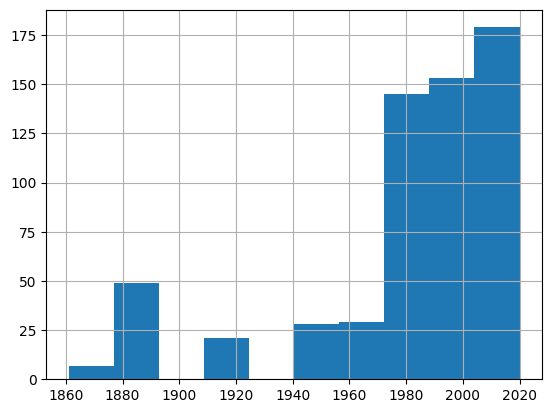

In [6]:
df['Founded'].hist()

<Axes: >

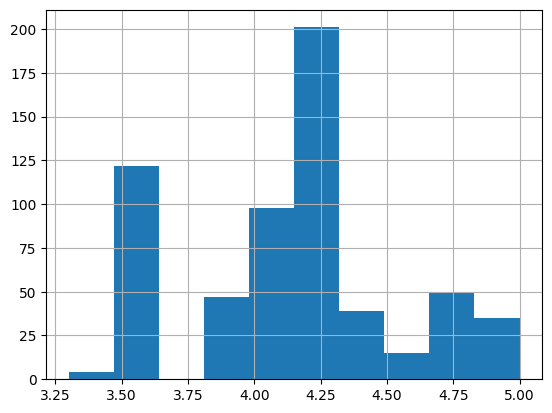

In [7]:
df['Rating'].hist()

array([[<Axes: title={'center': 'MinSalary'}>,
        <Axes: title={'center': 'MaxSalary'}>]], dtype=object)

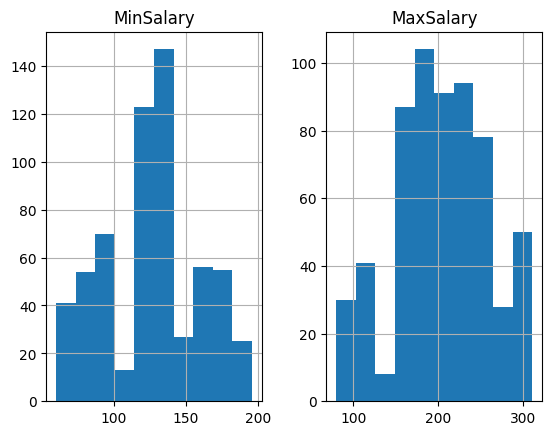

In [8]:
df[['MinSalary', 'MaxSalary']].hist()

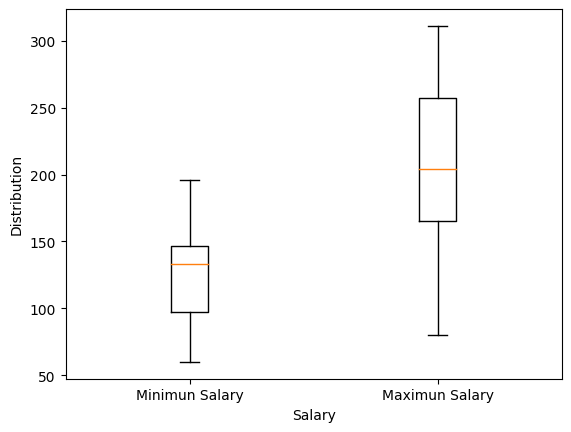

In [9]:
fig, ax = plt.subplots()

min_salary = df['MinSalary']
max_salary = df['MaxSalary']

data = [min_salary, max_salary]

ax.boxplot(data, labels=['Minimun Salary', 'Maximun Salary'])

ax.set_xlabel('Salary')
ax.set_ylabel('Distribution')

plt.show()

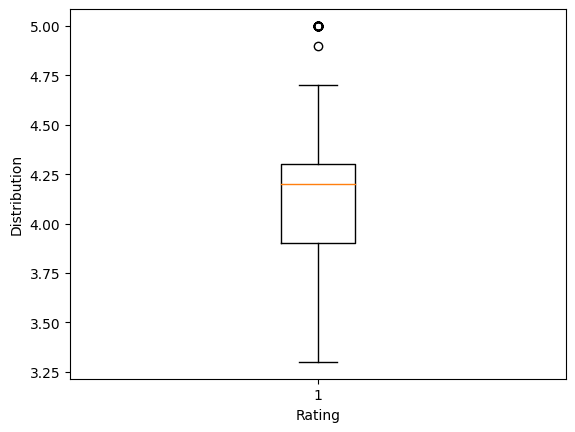

In [10]:
fig, ax = plt.subplots()

ax.boxplot(df.Rating)

ax.set_xlabel('Rating')
ax.set_ylabel('Distribution')

plt.show()

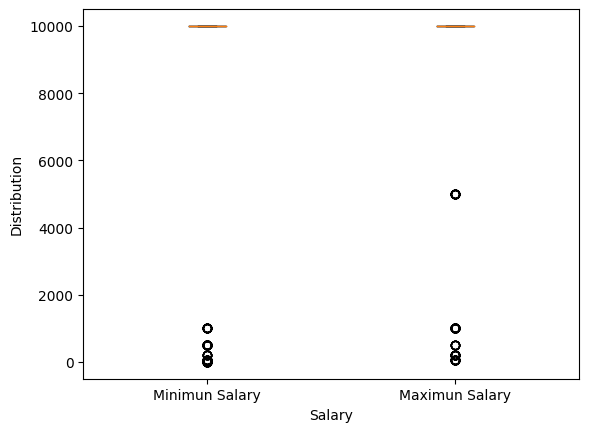

In [11]:
fig, ax = plt.subplots()

min_salary = df['MinSize']
max_salary = df['MaxSize']

data = [min_salary, max_salary]

ax.boxplot(data, labels=['Minimun Salary', 'Maximun Salary'])

ax.set_xlabel('Salary')
ax.set_ylabel('Distribution')

plt.show()

We can see that the most popular salary is 10000+

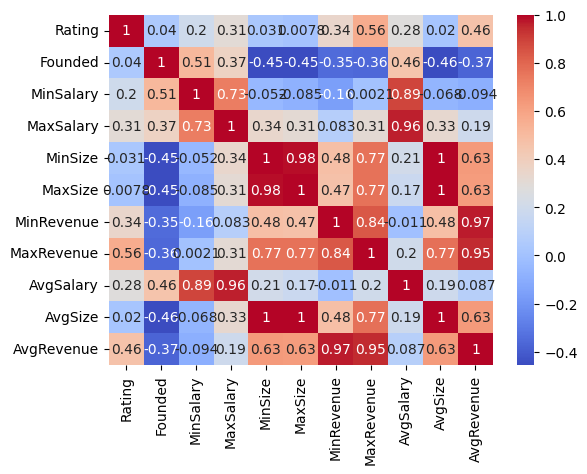

In [12]:
correlation_matrix = df[df.select_dtypes(include=['int', 'float']).columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.subplots_adjust(left=0.15, bottom=0.15)

plt.show()

Here we can see the correlations between the different variables, but let's see them in a more simple way.

In [13]:
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.select_dtypes(include=['int', 'float']).columns
    for i in range(0, len(cols)):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    correlation_matrix = df[df.select_dtypes(include=['int', 'float']).columns].corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    correlation_matrix = correlation_matrix.drop(labels=labels_to_drop).sort_values(ascending=False)
    return correlation_matrix[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 20))

Top Absolute Correlations
MinSize     AvgSize       0.996370
MaxSize     AvgSize       0.995799
MinSize     MaxSize       0.984389
MinRevenue  AvgRevenue    0.967271
MaxSalary   AvgSalary     0.962214
MaxRevenue  AvgRevenue    0.948351
MinSalary   AvgSalary     0.889248
MinRevenue  MaxRevenue    0.836818
MaxRevenue  AvgSize       0.769666
MinSize     MaxRevenue    0.765658
MaxSize     MaxRevenue    0.765481
MinSalary   MaxSalary     0.731093
AvgSize     AvgRevenue    0.633132
MinSize     AvgRevenue    0.632144
MaxSize     AvgRevenue    0.627078
Rating      MaxRevenue    0.563161
Founded     MinSalary     0.511520
MinSize     MinRevenue    0.478541
MinRevenue  AvgSize       0.477041
MaxSize     MinRevenue    0.469939
dtype: float64


In [14]:
df[df.select_dtypes(include=['int', 'float']).columns].corrwith(df['AvgSalary'])

Rating        0.282903
Founded       0.455138
MinSalary     0.889248
MaxSalary     0.962214
MinSize       0.206893
MaxSize       0.173707
MinRevenue   -0.011014
MaxRevenue    0.202021
AvgSalary     1.000000
AvgSize       0.191652
AvgRevenue    0.087251
dtype: float64

In [15]:
df_cat = df[df.select_dtypes(exclude=['int', 'float']).columns]
df_cat

,PublishedAgo,Employer,JobTitle,Type,Industry,Sector,City,State,Country,Experience,Profession
0,5d,KGS Technology Group Inc,Junior Software Engineer,Company - Private,Information Technology Support Services,Information Technology,Remote,Remote,Remote,Junior,Software Engineer
1,4d,"QSC, LLC",AI Engineer,Company - Private,Electronics Manufacturing,Manufacturing,Remote,Remote,Remote,NA,AI Engineer
2,30d+,MIT Lincoln Laboratory,AI Engineer,Nonprofit Organization,Aerospace & Defense,Aerospace & Defense,Lexington,MA,United States,NA,AI Engineer
3,6d,Hewlett Packard Enterprise,AI Solution Engineer,Company - Public,Information Technology Support Services,Information Technology,San Jose,CA,United States,NA,AI Engineer
4,2d,Oran Inc,AI/ML Cloud Engineer,Company - Private,Business Consulting,Management & Consulting,Remote,Remote,Remote,NA,AI Engineer
...,...,...,...,...,...,...,...,...,...,...,...
606,9d,PayPal,AI Machine Learning Engineer,Company - Public,Internet & Web Services,Information Technology,San Jose,CA,United States,NA,ML Engineer
607,12d,Eightfold.AI,Machine Learning Engineer,Company - Private,Enterprise Software & Network Solutions,Information Technology,Santa Clara,CA,United States,NA,ML Engineer
608,30d+,Adobe,Research Scientist/Engineer,Company - Public,Computer Hardware Development,Information Technology,San Jose,CA,United States,NA,Research Engineer
609,30d+,Curai,Machine Learning Engineer (Remote),Company - Private,Hospitals & Health Clinics,Healthcare,San Francisco,CA,United States,NA,ML Engineer


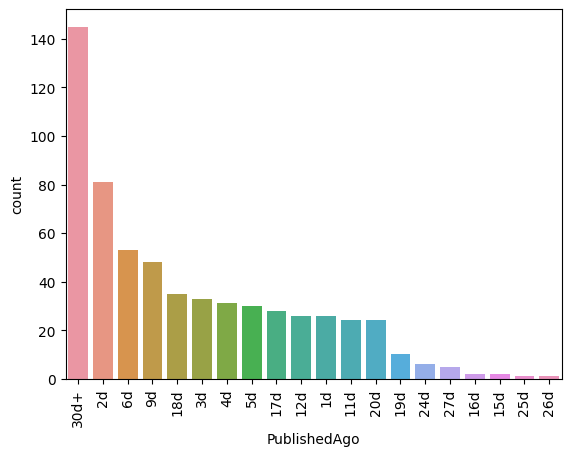

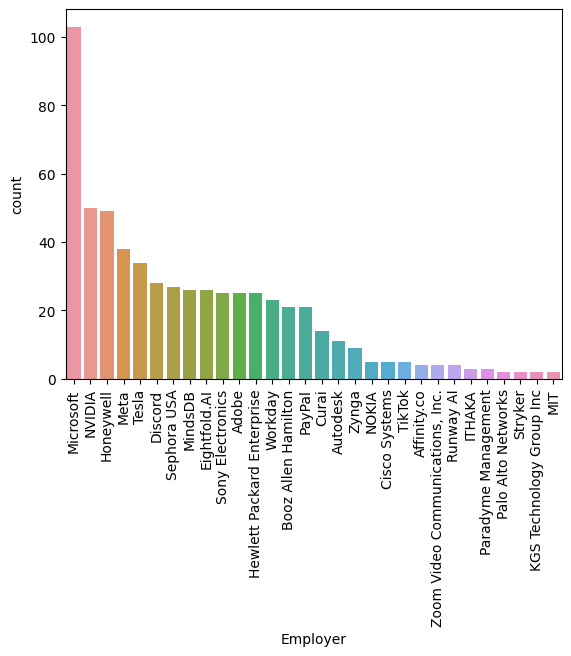

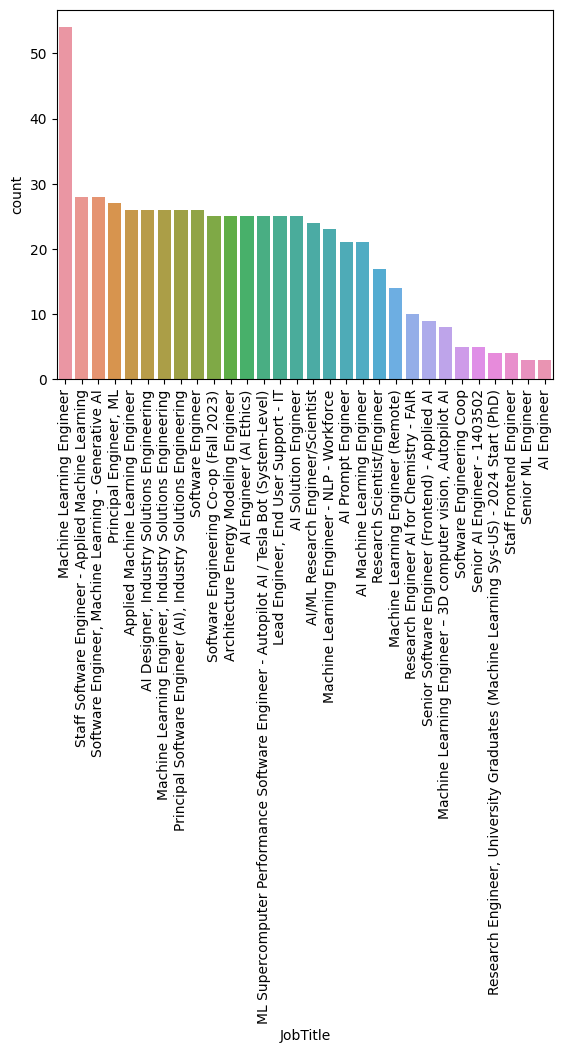

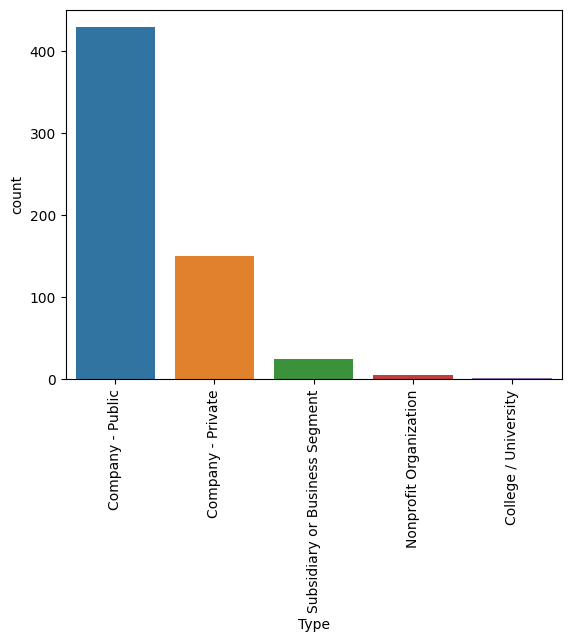

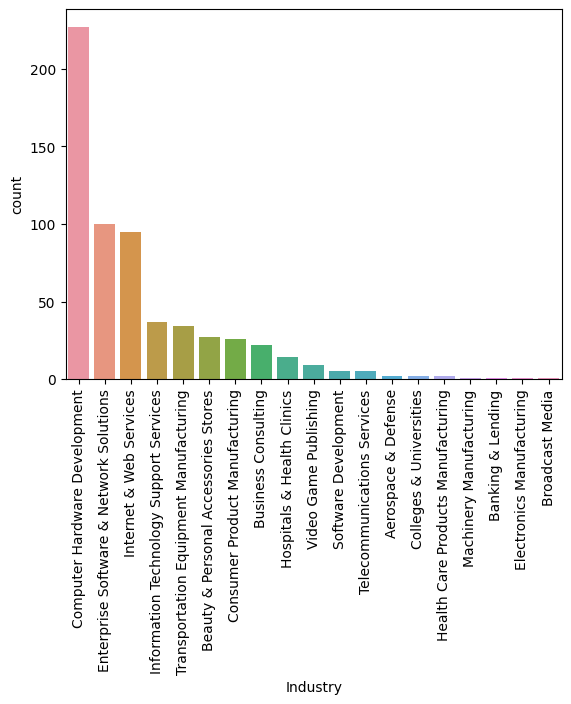

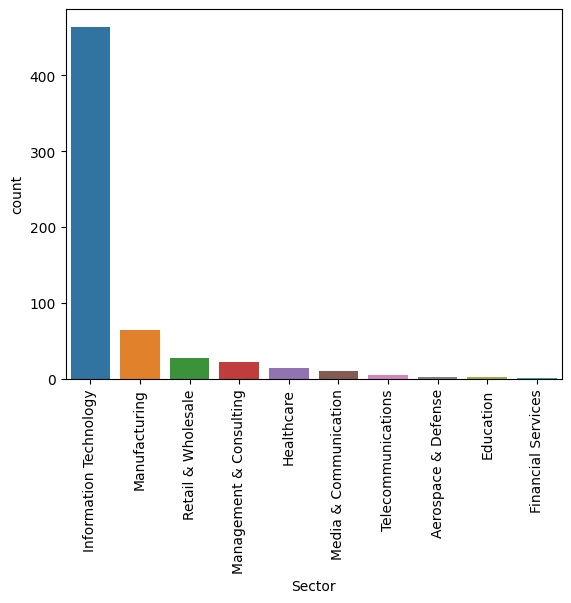

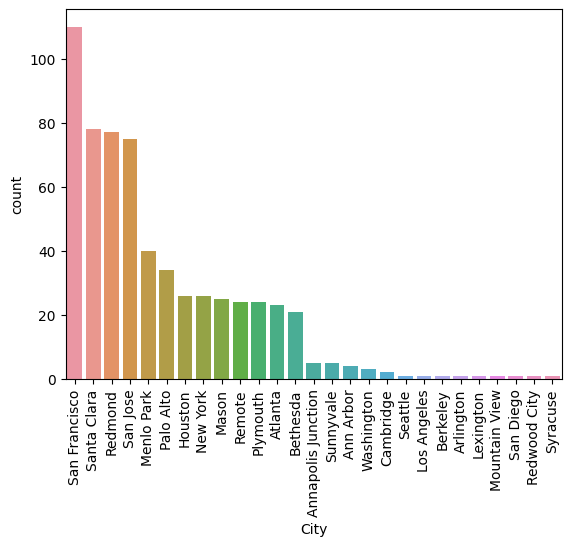

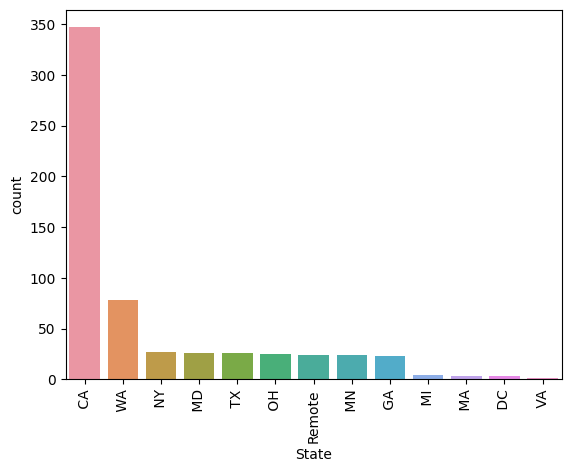

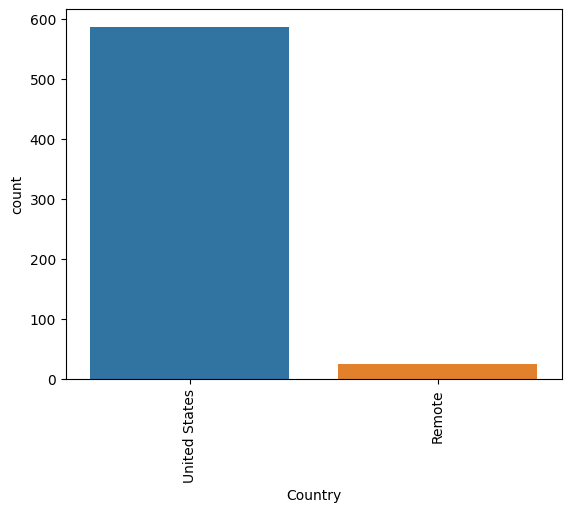

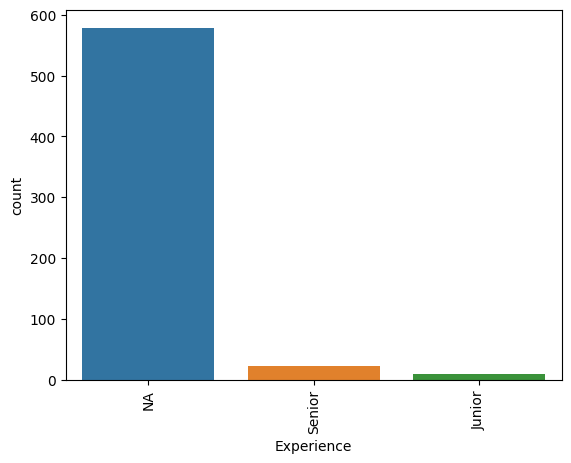

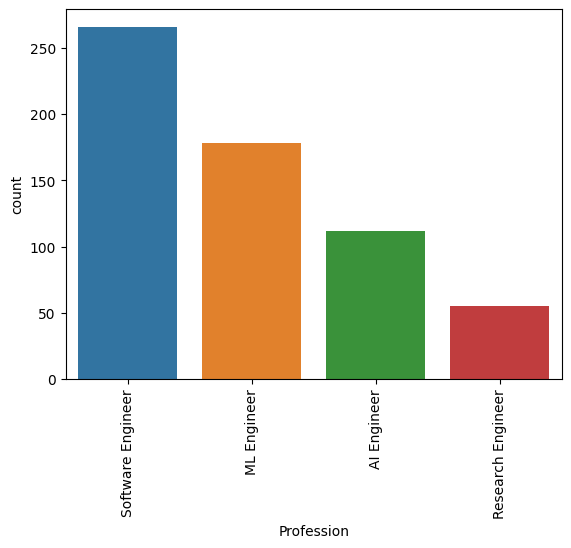

In [16]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()[:30]
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [17]:
pd.pivot_table(df, index=['Profession', 'Experience'], values='AvgSalary')

AvgSalary
Profession        Experience            
AI Engineer       Junior       74.500000
                  NA          168.296154
                  Senior      129.000000
ML Engineer       Junior       90.000000
                  NA          165.231214
                  Senior      193.125000
Research Engineer Junior      171.000000
                  NA          128.372549
Software Engineer Junior       70.000000
                  NA          178.318725
                  Senior      112.500000

Clearly the senior salaries are higher, but we have a lot of NaN values.

In [18]:
pd.pivot_table(df, index=['State', 'Profession'], values='AvgSalary').sort_values('State', ascending=False)

AvgSalary
State  Profession                   
Remote Software Engineer  108.500000
       ML Engineer        120.600000
       AI Engineer        138.450000
 WA    Software Engineer  155.673077
       ML Engineer        195.500000
 VA    ML Engineer         80.500000
 TX    AI Engineer        195.500000
 OH    Software Engineer  102.560000
 NY    AI Engineer        130.000000
       Software Engineer  151.500000
       ML Engineer         90.000000
 MN    Research Engineer   73.000000
 MI    Software Engineer  171.000000
       AI Engineer         92.500000
 MD    AI Engineer        147.980769
 MA    ML Engineer        137.500000
       AI Engineer        116.000000
 GA    ML Engineer        174.000000
 DC    AI Engineer         74.500000
 CA    ML Engineer        160.950000
       Software Engineer  196.526471
       Research Engineer  176.741935
       AI Engineer        200.192308

In [19]:
pd.pivot_table(df, index=['State', 'Profession'], values='AvgSalary', aggfunc='count').sort_values('State', ascending=False)

AvgSalary
State  Profession                  
Remote Software Engineer         15
       ML Engineer                5
       AI Engineer                4
 WA    Software Engineer         52
       ML Engineer               26
 VA    ML Engineer                1
 TX    AI Engineer               26
 OH    Software Engineer         25
 NY    AI Engineer               25
       Software Engineer          1
       ML Engineer                1
 MN    Research Engineer         24
 MI    Software Engineer          3
       AI Engineer                1
 MD    AI Engineer               26
 MA    ML Engineer                2
       AI Engineer                1
 GA    ML Engineer               23
 DC    AI Engineer                3
 CA    ML Engineer              120
       Software Engineer        170
       Research Engineer         31
       AI Engineer               26

In [20]:
df.columns

Index(['PublishedAgo', 'Rating', 'Employer', 'JobTitle', 'Founded', 'Type',
       'Industry', 'Sector', 'MinSalary', 'MaxSalary', 'City', 'State',
       'Country', 'MinSize', 'MaxSize', 'MinRevenue', 'MaxRevenue',
       'Experience', 'Profession', 'AvgSalary', 'AvgSize', 'AvgRevenue'],
      dtype='object')

In [21]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'AvgRevenue', 'AvgSize', 'Type', 'Employer', 'Founded', 'AvgSalary']]

In [22]:
for i in df_pivots.columns:
    print(pd.pivot_table(df_pivots,index=i, values = 'AvgSalary').sort_values('AvgSalary', ascending = False)) if i != 'AvgSalary' else None

         AvgSalary
Rating            
4.7     237.750000
3.9     185.957447
3.6     175.016129
4.5     173.466667
4.3     172.509091
5.0     169.832353
4.2     168.829670
3.5     155.200000
4.4     152.679487
4.1     141.166667
3.3     140.000000
4.9     135.000000
4.0     116.078947
3.4      74.500000
                                          AvgSalary
Industry                                           
Beauty & Personal Accessories Stores     203.500000
Internet & Web Services                  178.647368
Hospitals & Health Clinics               175.000000
Health Care Products Manufacturing       171.500000
Computer Hardware Development            171.033040
Information Technology Support Services  169.629730
Software Development                     168.500000
Enterprise Software & Network Solutions  157.255000
Transportation Equipment Manufacturing   153.088235
Business Consulting                      151.931818
Broadcast Media                          151.500000
Telecommunications S

In [23]:
df.to_csv('data_eda.csv', index=False)